# 01a_dominant_color

### Looking for a less expensive calculation

source: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/

In [144]:
from sklearn.cluster import KMeans
from collections import Counter
import cv2 #for resizing image
import matplotlib.pyplot as plt

def get_dominant_color(image, k=4):
    
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to RGB to get the right order
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
   
    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

    return dominant_color

## Decompose and understand the code

In [98]:
image = cv2.imread("../00_data/00_test_pic/frog_2.jpg")
image

array([[[ 39,  97,  43],
        [ 39,  97,  43],
        [ 39,  97,  43],
        ...,
        [ 23,  56,  22],
        [ 23,  54,  23],
        [115, 139, 115]],

       [[ 39,  97,  43],
        [ 39,  97,  43],
        [ 39,  97,  43],
        ...,
        [ 23,  56,  22],
        [ 22,  53,  22],
        [115, 139, 115]],

       [[ 39,  97,  43],
        [ 39,  97,  43],
        [ 39,  97,  43],
        ...,
        [ 23,  56,  22],
        [ 22,  53,  22],
        [115, 140, 114]],

       ...,

       [[ 15, 110,  36],
        [ 15, 110,  36],
        [ 16, 111,  37],
        ...,
        [ 26, 130,  53],
        [ 26, 131,  58],
        [118, 182, 136]],

       [[ 18, 109,  34],
        [ 16, 109,  34],
        [ 14, 109,  34],
        ...,
        [ 27, 132,  59],
        [ 25, 133,  61],
        [117, 183, 134]],

       [[ 18, 109,  34],
        [ 16, 109,  34],
        [ 14, 109,  34],
        ...,
        [ 27, 132,  59],
        [ 25, 133,  60],
        [117, 183, 134]]

In [100]:
image.shape

(410, 618, 3)

In [101]:
image.shape[0]

410

In [102]:
image.shape[1]

618

In [103]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [105]:
image.shape

(2742336, 3)

In [106]:
clt = KMeans(n_clusters = 4)
labels = clt.fit_predict(image)

In [107]:
labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [108]:
label_counts = Counter(labels)
label_counts

Counter({1: 1542343, 0: 212668, 3: 612656, 2: 374669})

In [109]:
clt.cluster_centers_

array([[164.08289089, 161.21790927, 160.25827361],
       [250.63096287, 250.61660534, 250.5981324 ],
       [ 29.67049664,  25.4899273 ,  24.45517994],
       [ 92.92694591,  88.13540934,  87.71181998]])

In [110]:
label_counts.most_common(1)

[(1, 1542343)]

In [111]:
label_counts.most_common()[0][0]

1

In [112]:
label_counts.most_common(1)

[(1, 1542343)]

In [113]:
label_counts.most_common(1)[0][0]

1

In [132]:
clt.cluster_centers_[0]

array([164.08289089, 161.21790927, 160.25827361])

In [136]:
dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

### Use Matplotlib to plot the color based on the R,G,B values passed

! Attention: Matplot lib read arrays in the order R, G, B. So in combination with using cv2.imread, the order needs to be swapped first !

In [146]:
import numpy as np

test_color = np.array([111.59875899,  15.93127865,  26.88711661])

In [147]:
colors_scaled = []
for color in test_color: 
    color_scaled = color / 255 
    colors_scaled.append(color_scaled)
    
colors_scaled

[0.43764219211764704, 0.062475602549019606, 0.10543967298039215]

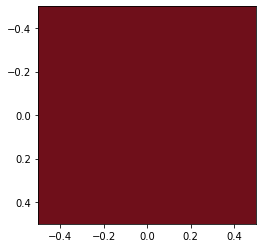

In [148]:
plt.imshow([[colors_scaled]])
plt.show()

#### The current function returns a np.array containing the B,G,R value

In [145]:
get_dominant_color("../00_data/00_test_pic/red.jpg", k=4)

array([111.59875899,  15.93127865,  26.88711661])

    #resize image if new dims provided
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

### Update the function to take more than 1 file

In [190]:
from os.path import isfile, join
from os import listdir
import pandas as pd

def get_dominant_color(path_to_library, k=4):
    
    result = []
    
    file_list = [f for f in listdir(path_to_library) if isfile(join(path_to_library, f))] 

    for file_path in file_list: 
        image = cv2.imread(path_to_library + "/" + file_path) # CV2 reads the array in BGR! 
        
        if image is None: 
            print(f"The image {file_path} is not readable.")
        
        else: 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to RGB to get the right order
            image = image.reshape((image.shape[0] * image.shape[1], 3))
    
            #cluster and assign labels to the pixels 
            clt = KMeans(n_clusters = k)
            labels = clt.fit_predict(image)
        
            #count labels to find most popular
            label_counts = Counter(labels)
        
            #subset out most popular centroid
            dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
            image_result = list([file_path]) + list(dominant_color)
            result.append(image_result)
            
    return result #result is a list of sub-lists. Each sub-list contains 4 elements: file_path, r,g,b

In [188]:
get_dominant_color("../00_data/00_test_pic/")

The image .DS_Store is not readable.


[['test.jpg', 250.59813240417515, 250.61660534295163, 250.6309628723714],
 ['airplane.jpg', 233.64661037482563, 178.6402284775873, 142.73197763744676],
 ['red.jpg', 111.64653018607548, 15.949919826973751, 26.91374874147073]]